# Imports

In [1]:
import os
os.chdir("D:\PulpitE\FPL_ML")

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv('data/previous/FPL_logs.csv')

# General info

In [4]:
df.columns

Index(['Date', 'Day', 'Venue', 'Team', 'Opponent', 'Name', 'Start', 'Pos',
       'Min', 'Gls', 'Ast', 'PK', 'PKatt', 'Sh', 'SoT', 'CrdY', 'CrdR',
       'Touches', 'Tkl', 'Int', 'Blocks', 'xG', 'npxG', 'xA', 'SCA', 'GCA',
       'Cmp', 'Att', 'Cmp%', 'PrgP', 'Carries', 'PrgC', 'T_att', 'T_succ',
       'Season', 'WDL', 'Team_score', 'Opp_score', 'Team_CS', 'Was_home', 'GW',
       'Clean_name', 'FPL_name', 'FPL_team', 'FPL_opp_team', 'Name_original',
       'FPL_pos', 'FPL_ast', 'Bonus', 'Bps', 'Player_CS', 'Creativity',
       'Element', 'Fixture', 'Player_GC', 'Goals_scored', 'ICT_index',
       'Influence', 'Kickoff_time', 'FPL_min', 'Own_goals', 'Penalties_missed',
       'Penalties_saved', 'Saves', 'Selected', 'Threat', 'FPL_points',
       'Transfers_balance', 'Transfers_in', 'Transfers_out', 'Price', 'FPL_GW',
       'xP', 'FPL_xA', 'FPL_xGI', 'FPL_xG', 'FPL_xGC', 'Opp_rating',
       'Team_rating', 'Min_points', 'Avg_FPL_points'],
      dtype='object')

In [5]:
df.shape

(18373, 81)

In [6]:
df.describe()

,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Tkl,Int,Blocks,xG,npxG,xA,SCA,GCA,Cmp,Att,Cmp%,PrgP,Carries,PrgC,T_att,T_succ,Team_score,Opp_score,Team_CS,Was_home,GW,Clean_name,FPL_ast,Bonus,Bps,Player_CS,Creativity,Element,Fixture,Player_GC,Goals_scored,ICT_index,Influence,FPL_min,Own_goals,Penalties_missed,Penalties_saved,Saves,Selected,Threat,FPL_points,Transfers_balance,Transfers_in,Transfers_out,Price,FPL_GW,xP,FPL_xA,FPL_xGI,FPL_xG,FPL_xGC,Opp_rating,Team_rating,Min_points,Avg_FPL_points
count,18370.000000,18373.000000,18373.000000,18373.000000,18373.000000,18373.000000,18373.000000,18373.000000,18373.000000,18080.000000,18080.000000,18373.000000,18080.000000,18080.000000,18080.000000,18080.000000,18080.000000,18080.000000,18080.000000,18080.000000,17927.000000,18080.000000,18080.000000,18080.000000,18080.000000,18080.000000,18373.000000,18373.000000,18373.000000,18373.000000,18373.000000,0.0,18373.000000,18373.000000,18373.000000,18373.000000,18373.000000,18373.000000,18373.000000,18373.000000,18373.000000,18373.000000,18373.000000,18373.000000,18373.000000,18373.000000,18373.000000,18373.000000,1.837300e+04,18373.000000,18373.000000,1.837300e+04,1.837300e+04,1.837300e+04,18373.000000,0.0,18257.000000,603.000000,603.000000,603.000000,603.000000,18373.000000,18373.000000,0.0,18373.000000
mean,54.637235,0.077614,0.057421,0.006259,0.007620,0.704839,0.234855,0.099113,0.002449,34.636670,0.914768,0.498340,0.647788,0.080420,0.074320,0.059491,1.281416,0.140708,22.695631,28.492865,59.914358,2.167257,19.627268,0.992146,0.983628,0.482688,1.507919,1.296413,0.305067,0.501225,18.933217,NaN,0.071518,0.192946,10.182714,0.188973,7.977919,293.603385,184.690687,0.788276,0.076961,2.816726,11.665498,54.357644,0.002830,0.001361,0.000980,0.155173,3.966031e+05,8.535024,2.375225,9.859242e+03,3.065214e+04,2.079288e+04,5.286067,NaN,2.570773,0.060995,0.153864,0.092886,0.999751,1779.711938,1799.892713,NaN,2.375225
std,39.009707,0.299623,0.249801,0.082907,0.091832,1.172531,0.565905,0.302982,0.049431,29.585415,1.339484,0.889044,1.016026,0.198299,0.177083,0.152166,1.826572,0.422554,22.895837,26.461597,34.090743,2.849336,18.701464,1.598732,1.628898,0.957143,1.343151,1.246151,0.460448,0.500012,11.259312,NaN,0.280356,0.646593,10.952438,0.391498,13.029579,188.994789,112.619177,1.095246,0.298335,3.440749,14.608999,39.205738,0.053126,0.036863,0.031286,0.797906,8.940200e+05,15.700822,2.997125,9.054561e+04,8.937954e+04,5.380084e+04,1.335815,NaN,2.489176,0.128855,0.271726,0.217226,0.992992,109.659735,110.575569,NaN,1.263017
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,0.000000,0.000000,-19.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-4.000000,-1.018924e+06,0.000000e+00,0.000000e+00,3.700000,NaN,-3.000000,0.000000,0.000000,0.000000,0.000000,1579.959106,1579.959106,NaN,-2.000000
25%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,50.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,123.000000,85.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.909000e+04,0.000000,0.000000,-2.554000e+03,4.130000e+02,6.880000e+02,4.500000,NaN,1.000000,0.000000,0.000000,0.000000,0.070000,1701.295044,1718.137085,NaN,1.490196
50%,77.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,17.000000,25.000000,73.800000,1.000000,16.000000,0.000000,0.000000,0.000000,1.000000,1.000000

In [7]:
df[["xP", "FPL_points"]].describe()

,xP,FPL_points
count,18257.000000,18373.000000
mean,2.570773,2.375225
std,2.489176,2.997125
min,-3.000000,-4.000000
25%,1.000000,0.000000
50%,2.000000,1.000000
75%,3.500000,3.000000
max,19.000000,24.000000


In [8]:
df["xP"].sum(), df["FPL_points"].sum()

(46934.6, 43640)

In [9]:
df["xG"].sum(), df["Gls"].sum()

(1454.0000000000002, 1426.0)

In [10]:
df["xA"].sum(), df["Ast"].sum()

(1075.6000000000001, 1055.0)

In [11]:
df.isna().sum().sort_values(ascending=False).head(30)

FPL_GW             18373
Min_points         18373
Clean_name         18373
FPL_xA             17770
FPL_xGC            17770
FPL_xG             17770
FPL_xGI            17770
Cmp%                 446
xA                   293
SCA                  293
Cmp                  293
Att                  293
GCA                  293
PrgP                 293
xG                   293
Carries              293
PrgC                 293
T_att                293
T_succ               293
npxG                 293
Tkl                  293
Blocks               293
Touches              293
xP                   116
Min                    3
Pos                    3
Kickoff_time           0
Penalties_saved        0
Influence              0
ICT_index              0
dtype: int64

# Plots

<AxesSubplot:xlabel='Team', ylabel='FPL_points'>

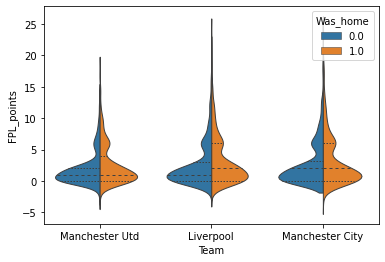

In [12]:
sns.violinplot(data=df[df["Team"].isin(["Liverpool", "Manchester City", "Manchester Utd"])], 
               x="Team", y="FPL_points", hue="Was_home",
               split=True, inner="quart", linewidth=1)

In [13]:
df["PKatt"].sum(), df["PK"].sum(), df["Penalties_saved"].sum()

(140.0, 115.0, 18)

[Text(0, 0, '100.00%'),
 Text(0, 0, '82.14%'),
 Text(0, 0, '12.86%'),
 Text(0, 0, '5.00%')]

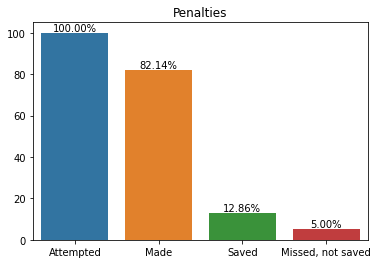

In [22]:
att = df["PKatt"].sum()
made = df["PK"].sum()
saved = df["Penalties_saved"].sum()
missed = att - made - saved
[att, made, saved, missed] = [att, made, saved, missed] / att * 100

ax = sns.barplot(x=["Attempted", "Made", "Saved", "Missed, not saved"], y=[att, made, saved, missed])
ax.set(title='Penalties')
ax.bar_label(ax.containers[0], fmt='%.2f%%', label_type='edge')

[Text(0, 0, '58.21%'), Text(0, 0, '41.79%')]

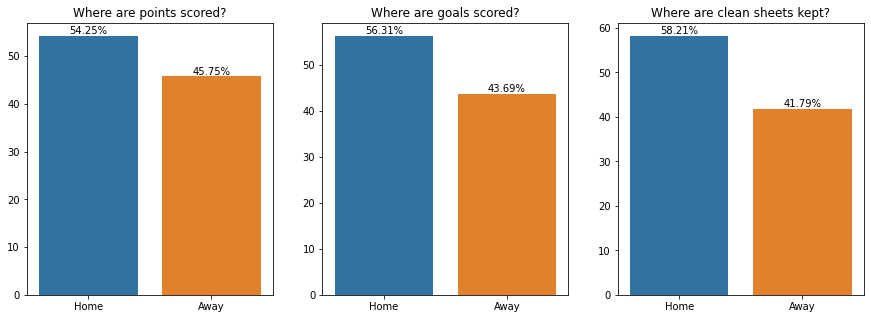

In [54]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(15, 5)

# ax1
home = df[df["Was_home"] == True]["FPL_points"].sum()
not_home = df[df["Was_home"] == False]["FPL_points"].sum()
[home, not_home] = [home, not_home] / (home + not_home) * 100

ax = sns.barplot(x=["Home", "Away"], y=[home, not_home], ax=ax1)
ax.set(title='Where are points scored?')
ax.bar_label(ax.containers[0], fmt='%.2f%%', label_type='edge')

# ax2
home = df[df["Was_home"] == True]["Gls"].sum()
not_home = df[df["Was_home"] == False]["Gls"].sum()
[home, not_home] = [home, not_home] / (home + not_home) * 100

ax = sns.barplot(x=["Home", "Away"], y=[home, not_home], ax=ax2)
ax.set(title='Where are goals scored?')
ax.bar_label(ax.containers[0], fmt='%.2f%%', label_type='edge')

# ax3
home = df[df["Was_home"] == True]["Player_CS"].sum()
not_home = df[df["Was_home"] == False]["Player_CS"].sum()
[home, not_home] = [home, not_home] / (home + not_home) * 100

ax = sns.barplot(x=["Home", "Away"], y=[home, not_home], ax=ax3)
ax.set(title='Where are clean sheets kept?')
ax.bar_label(ax.containers[0], fmt='%.2f%%', label_type='edge')

[Text(0, 0, '2.00'),
 Text(0, 0, '2.18'),
 Text(0, 0, '2.53'),
 Text(0, 0, '2.80')]

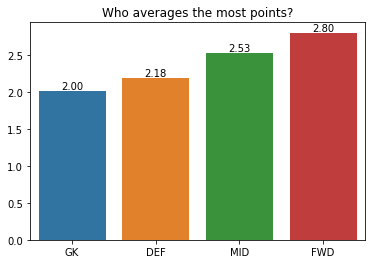

In [69]:
gks = df[df["FPL_pos"] == "GK"]["FPL_points"].mean()
defs = df[df["FPL_pos"] == "DEF"]["FPL_points"].mean()
mids = df[df["FPL_pos"] == "MID"]["FPL_points"].mean()
fwds = df[df["FPL_pos"] == "FWD"]["FPL_points"].mean()
# [home, not_home] = [home, not_home] / (home + not_home) * 100

ax = sns.barplot(x=["GK", "DEF", "MID", "FWD"], y=[gks, defs, mids, fwds])
ax.set(title='Who averages the most points?')
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge')